<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Lecture-4_January-22-2026/Lecture-4_January-22-2026_sklearn_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 4 - January 22, 2026






In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.dpi'] = 100

## scikit-learn (sklearn)

[scikit-learn](https://scikit-learn.org/stable/) is a very useful python package that implements a wide range of machine learning methods.

- [scikit-learn user guide](https://scikit-learn.org/stable/user_guide.html)
- [scikit-learn examples](https://scikit-learn.org/stable/auto_examples/index.html)


### Probability densites $P(\mathbf{x})$

A common task is machine learning is that we have a set of $N$ samples $\{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$\} sampled from some unknown probability density $P(\mathbf{x})$, and we want to estimate some properties of the probability density $P(\mathbf{x})$.

For example, we often want to estimate the probability density $P(\mathbf{x})$ itself. One can do this by doing a simple histogram, like we have seen before. One can employ a [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE), that is non-parameteric method (i.e., does not make any assumptions about the underlying distribution). Another method that we employ is a [Gaussian mixture model](https://www.ibm.com/think/topics/gaussian-mixture-model).


### Dataset

Here we will consider a dataset of two variables $x$ and $y$ sampled from a two-dimensional probability density $P(x,y)$ that is unknown.

This dataset is given in the file `Dataset_2D-TimeSeries.data` that includes time series of the two variables with $N=20001$ values.




In [30]:
# download datasets
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Lecture-4_January-22-2026/Dataset_2D-TimeSeries.data


In [31]:
data = pd.read_csv("Dataset_2D-TimeSeries.data")
data
# we can see here that this dataset is not loaded correctly as it is not in the
# typical format of a csv file


,#! FIELDS time x y
0,0.000000 -1.1740000000 ...
1,0.250000 -0.9327014168 ...
2,0.500000 -1.0005110093 ...
3,0.750000 -1.1728021721 ...
4,1.000000 -1.0749305283 ...
...,...
19996,4999.000000 1.3907610904 ...
19997,4999.250000 1.0994404288 ...
19998,4999.500000 0.9332634027 ...
19999,4999.750000 0.9604585423 ...


In [32]:
# we instead need to do some things by hand
data = pd.read_csv("Dataset_2D-TimeSeries.data",
                   sep="\\s+",
                   header=1,
                   names=['time','x','y'],
                   index_col=False)
data
# we could also have load the data by using np.load_txt()

,time,x,y
0,0.25,-0.932701,1.616446
1,0.50,-1.000511,1.216380
2,0.75,-1.172802,1.305709
3,1.00,-1.074931,1.182580
4,1.25,-1.379943,1.401605
...,...,...,...
19995,4999.00,1.390761,0.018853
19996,4999.25,1.099440,-0.073286
19997,4999.50,0.933263,-0.362733
19998,4999.75,0.960459,-0.625051


In [33]:
time = data['time'].to_numpy()
x = data['x'].to_numpy()
y = data['y'].to_numpy()

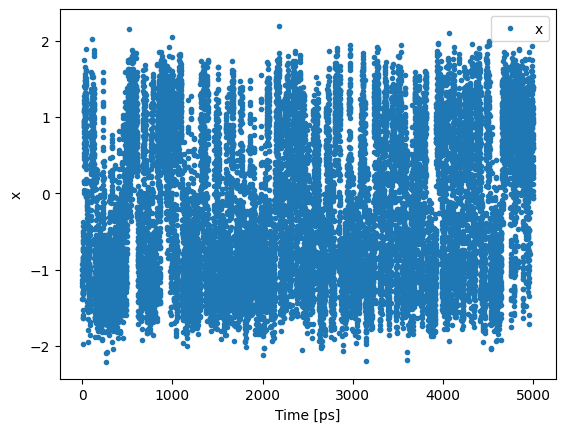

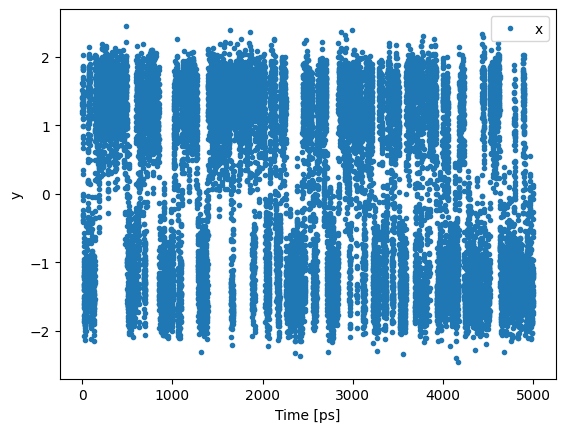

In [41]:
stride=1

plt.plot(time[::stride],x[::stride],'.',label="x")
plt.xlabel("Time [ps]")
plt.ylabel("x")
plt.legend()
plt.show()

plt.plot(time[::stride],y[::stride],'.',label="x")
plt.xlabel("Time [ps]")
plt.ylabel("y")
plt.legend()
plt.show()


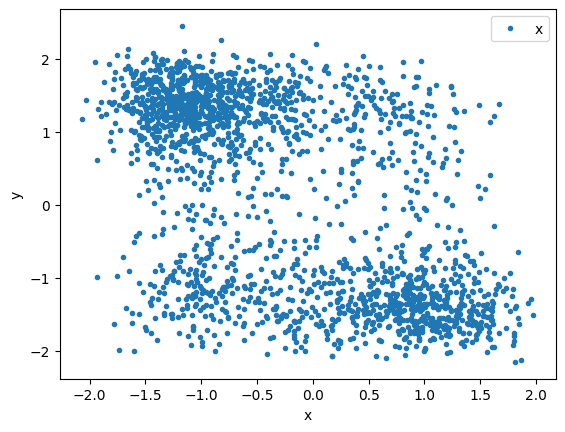

In [38]:
stride=10

plt.plot(x[::stride],y[::stride],'.',label="x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Variable x
- Average: -0.237
- Standard Deviation: 0.983


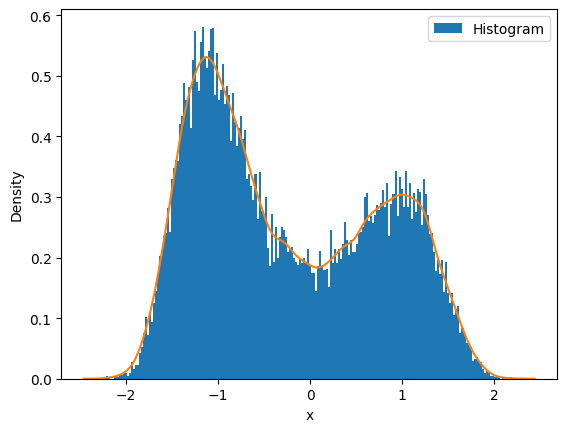

Variable y
- Average: 0.138
- Standard Deviation: 1.332


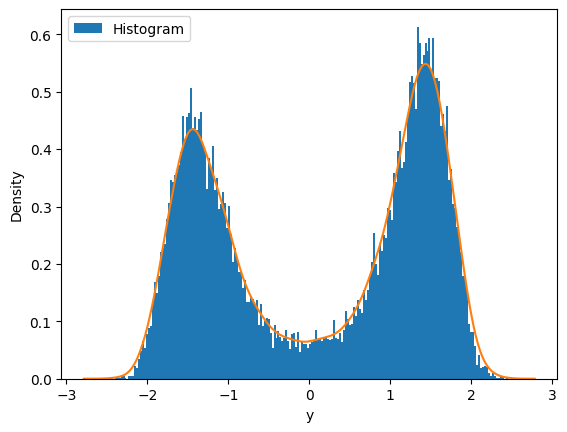

In [59]:
stride=1
nbins=200
bw_adjust=0.6

print("Variable x")
print("- Average: {:.3f}".format(np.average(x[::stride])))
print("- Standard Deviation: {:.3f}".format(np.std(x[::stride])))

plt.hist(x[::stride],bins=nbins,label="Histogram",density=True)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
sns.kdeplot(x[::stride],label="KDE", bw_adjust=bw_adjust)
plt.show()

print("Variable y")
print("- Average: {:.3f}".format(np.average(y[::stride])))
print("- Standard Deviation: {:.3f}".format(np.std(y[::stride])))


plt.hist(y[::stride],bins=nbins,label="Histogram",density=True)
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
sns.kdeplot(y[::stride],label="KDE", bw_adjust=bw_adjust)
plt.show()



In [63]:
y_sep = 0.0
y_lower_bool = y<y_sep
print(y_lower)

[False False False ...  True  True  True]


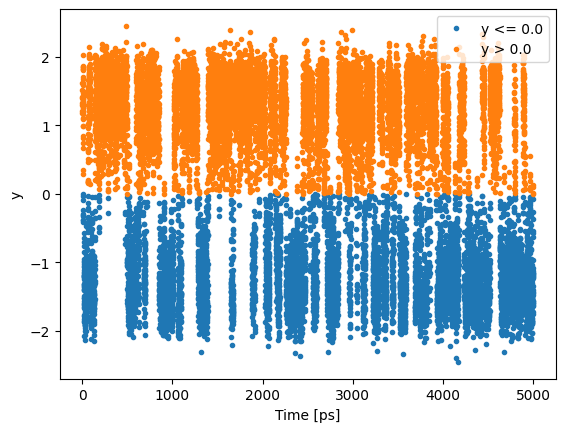

In [67]:
y_sep = 0.0

y_lower = y[y<=y_sep]
time_y_lower = time[y<=y_sep]

y_upper = y[y>y_sep]
time_y_upper = time[y>y_sep]

plt.plot(time_y_upper, y_upper,'.',label="y > 0.0")
plt.plot(time_y_lower, y_lower,'.',label="y <= 0.0")
plt.xlabel("Time [ps]")
plt.ylabel("y")
plt.legend()
plt.show()

Variable y - y <= 0.0
- Average: -1.251
- Standard Deviation: 0.448
Variable y - y > 0.0
- Average: 1.273
- Standard Deviation: 0.439


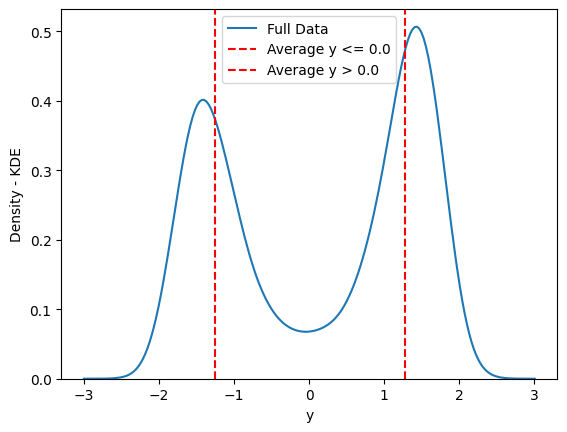

In [76]:
bw_adjust=1.0

print("Variable y - y <= 0.0")
print("- Average: {:.3f}".format(np.average(y_lower)))
print("- Standard Deviation: {:.3f}".format(np.std(y_lower)))

print("Variable y - y > 0.0")
print("- Average: {:.3f}".format(np.average(y_upper)))
print("- Standard Deviation: {:.3f}".format(np.std(y_upper)))


plt.xlabel("y")
plt.ylabel("Density - KDE")
sns.kdeplot(y,label="Full Data", bw_adjust=bw_adjust)
plt.axvline(x=np.average(y_lower), color='r', linestyle='--', label='Average y <= 0.0')
plt.axvline(x=np.average(y_upper), color='r', linestyle='--', label='Average y > 0.0')
plt.legend()
plt.show()

In [81]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2,
                     random_state=0,
                     n_init=10)

gm.fit(y)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.93270142 -1.00051101 -1.17280217 ...  0.9332634   0.96045854
  1.12856387].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [80]:
print("y.shape:",y.shape)
print("y.reshape(-1,1).shape:",y.reshape(-1,1).shape)

x.shape: (20000,)
x.reshape(1,-1).shape: (20000, 1)


In [93]:
from sklearn.mixture import GaussianMixture


gm = GaussianMixture(n_components=2,
                     random_state=0,
                     n_init=10)

gm.fit(y.reshape(-1,1))
print(gm.converged_)
print(gm.n_iter_)

True
2


In [92]:
print("Gaussian Mixture Model")
print("- Mean: ",gm.means_)
print("- Weights:", gm.weights_)

Gaussian Mixture Model
- Mean:  [[-0.97432394]
 [ 0.78362899]]
- Weights: [0.58084559 0.41915441]


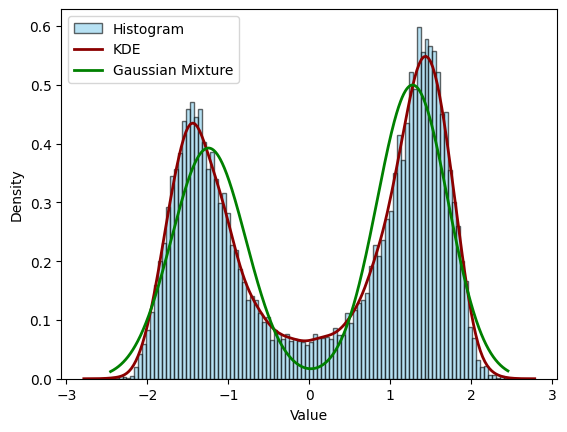

In [97]:
plt.hist(
    y,
    bins=100,
    density=True,
    alpha=0.6,
    color='skyblue',
    edgecolor='black',
    label='Histogram'
)

# KDE plot (Seaborn)
sns.kdeplot(
    y,
    color='darkred',
    linewidth=2,
    label='KDE',
    bw_adjust=0.6
)

x_grid = np.linspace(y.min(), y.max(), 1000)

pdf_gmm = gm.score_samples(x_grid.reshape(-1,1))
pdf_gmm = np.exp(pdf_gmm)

plt.plot(x_grid,
         pdf_gmm,
         label='Gaussian Mixture',
         color='green',
         linewidth=2
         )

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


True
6
Gaussian Mixture Model
0 - Mean: -0.729 / Weight: 0.137
1 - Mean: 1.481 / Weight: 0.373
2 - Mean: -1.448 / Weight: 0.318
3 - Mean: 0.853 / Weight: 0.172


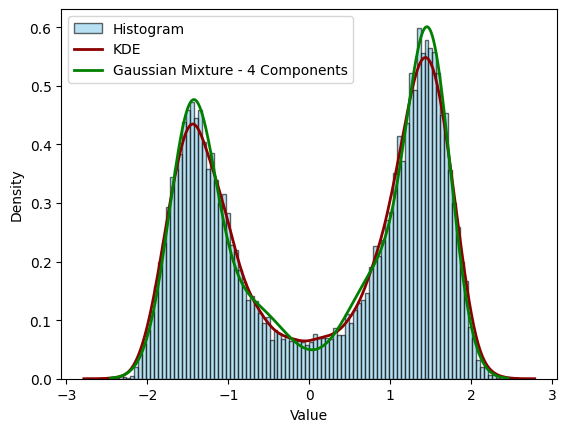

In [105]:
from sklearn.mixture import GaussianMixture

gmm_n_components=4

gm = GaussianMixture(n_components=gmm_n_components,
                     random_state=0,
                     n_init=10)

gm.fit(y.reshape(-1,1))
print(gm.converged_)
print(gm.n_iter_)

print("Gaussian Mixture Model")
for i in range(gmm_n_components):
  print("{:d} - Mean: {:.3f} / Weight: {:.3f}".format(i,gm.means_[i][0],gm.weights_[i]))

plt.hist(
    y,
    bins=100,
    density=True,
    alpha=0.6,
    color='skyblue',
    edgecolor='black',
    label='Histogram'
)

# KDE plot (Seaborn)
sns.kdeplot(
    y,
    color='darkred',
    linewidth=2,
    label='KDE',
    bw_adjust=0.6
)

x_grid = np.linspace(y.min(), y.max(), 1000)

pdf_gmm = gm.score_samples(x_grid.reshape(-1,1))
pdf_gmm = np.exp(pdf_gmm)

plt.plot(x_grid,
         pdf_gmm,
         label='Gaussian Mixture - {:d} Components'.format(gmm_n_components),
         color='green',
         linewidth=2
         )

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

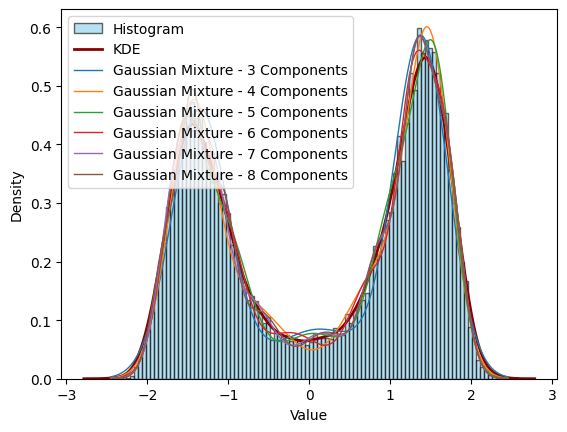

In [116]:
n_components = []
bic_values = []
aic_values = []


plt.hist(
    y,
    bins=100,
    density=True,
    alpha=0.6,
    color='skyblue',
    edgecolor='black',
    label='Histogram'
)

# KDE plot (Seaborn)
sns.kdeplot(
    y,
    color='darkred',
    linewidth=2,
    label='KDE',
    bw_adjust=0.6
)

for c in range(3,9):
  n_components.append(c)
  gm = GaussianMixture(n_components=c,
                     random_state=0,
                     n_init=10)

  gm.fit(y.reshape(-1,1))
  bic_values.append(gm.bic(y.reshape(-1,1)))
  aic_values.append(gm.aic(y.reshape(-1,1)))
  x_grid = np.linspace(y.min(), y.max(), 1000)

  pdf_gmm = gm.score_samples(x_grid.reshape(-1,1))
  pdf_gmm = np.exp(pdf_gmm)

  plt.plot(x_grid,
         pdf_gmm,
         label='Gaussian Mixture - {:d} Components'.format(c),
         linewidth=1
         )

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

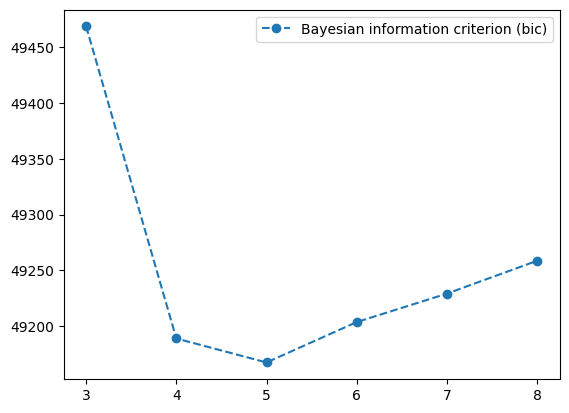

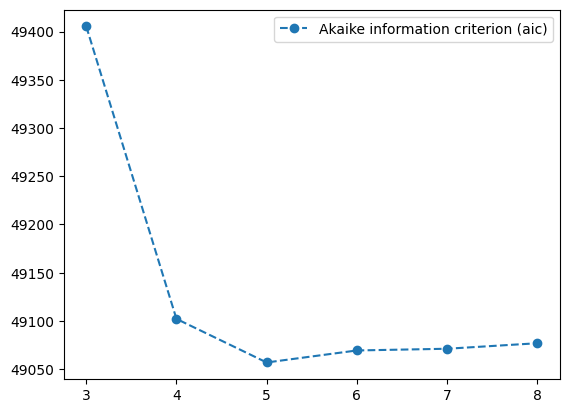

In [117]:
plt.plot(n_components,bic_values,label="Bayesian information criterion (bic)",linestyle='--', marker='o')
plt.legend()
plt.show()

plt.plot(n_components,aic_values,label="Akaike information criterion (aic)",linestyle='--', marker='o')
plt.legend()
plt.show()

Shape
- Full Dataset: (20000, 2)
- Training Dataset: (16000, 2)
- Test Dataset: (4000, 2)
[[-2.04264936  1.35647677]
 [-0.60879768  1.38124157]
 [-0.89955139 -1.647996  ]
 [ 0.64478471 -1.64465996]
 [-1.47113188  0.66747445]
 [ 0.67576467 -1.0369579 ]
 [-0.50228948  0.51635654]
 [-1.07219115  0.83237234]
 [ 0.95401452  1.0879185 ]
 [-0.02622537 -1.32245979]]


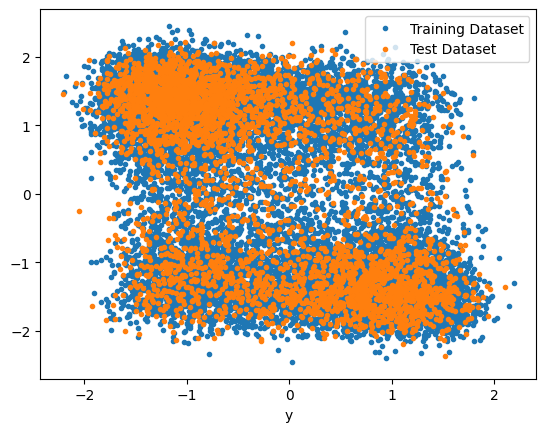

In [140]:
from sklearn.model_selection import train_test_split

XY_data = data[['x','y']].to_numpy()

# print(XY_data)

XY_train, XY_test = train_test_split(XY_data, test_size=0.20)

print("Shape")
print("- Full Dataset:",XY_data.shape)
print("- Training Dataset:",XY_train.shape)
print("- Test Dataset:",XY_test.shape)

print(XY_train[:10])


plt.plot(XY_train[:,0],XY_train[:,1],'.',label="Training Dataset")
plt.plot(XY_test[:,0],XY_test[:,1],'.',label="Test Dataset")
plt.legend()
plt.xlabel("x")
plt.xlabel("y")
plt.show()

In [144]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

XY_scaled = StandardScaler().fit_transform(XY_data)


Component  1
- Weight: 0.2839438485299946
- Mean: [ 0.91862864 -1.3552423 ]
Component  2
- Weight: 0.4037235252460545
- Mean: [-1.07040198  1.3561499 ]
Component  3
- Weight: 0.16898239184287492
- Mean: [-0.72754555 -1.01381038]
Component  4
- Weight: 0.14335023438107602
- Mean: [0.41953276 1.04179348]


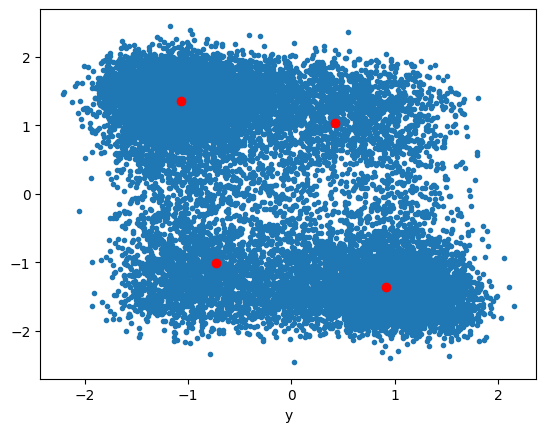

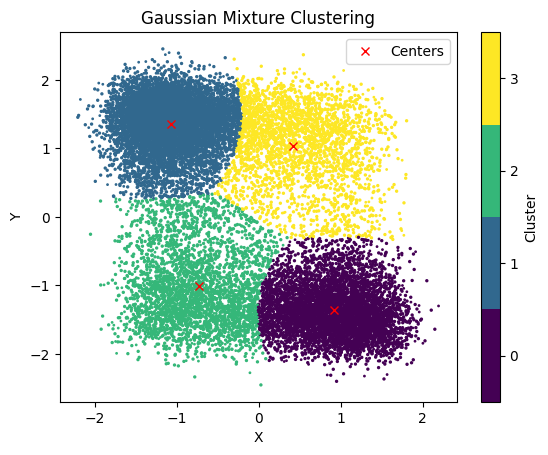

In [143]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

gm = GaussianMixture(n_components=4, random_state=0)

XY_data = data[['x','y']].to_numpy()

XY_train, XY_test = train_test_split(XY_data, test_size=0.20)

gm.fit(XY_train)

plt.plot(XY_train[:,0],XY_train[:,1],'.')
# plt.legend()
plt.xlabel("x")
plt.xlabel("y")

for i in range(gm.n_components):
  print("Component {:2d}".format(i+1))
  print("- Weight:",gm.weights_[i])
  print("- Mean:",gm.means_[i])
  # print("- Covarinace:",gm.covariances_[i])
  plt.plot(gm.means_[i,0],gm.means_[i,1],'o',color='red')


plt.show()


cluster_id_train = gm.predict(XY_train)
cluster_id_test = gm.predict(XY_test)

plt.scatter(XY_train[:,0],XY_train[:,1],c=cluster_id_train,s=2)
plt.scatter(XY_test[:,0],XY_test[:,1],c=cluster_id_test,s=1)

cbr = plt.colorbar(label='Cluster',
                   ticks=range(gm.n_components),
                   boundaries=np.arange(gm.n_components+1)-0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Clustering')
plt.plot(gm.means_[:,0],gm.means_[:,1],'x',color='red',label="Centers")
plt.legend()

plt.show()

In [ ]:
gm.predict_proba